In [65]:
#db necesscities
import sys, os
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
from dotenv import find_dotenv, load_dotenv

# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), "..")))
import dbConnection as db

load_dotenv(find_dotenv(usecwd=True))
HOST = os.getenv("HOST")
PORT = os.getenv("PORT", 5432)
DBNAME = os.getenv("DBNAME")
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")

conn = psycopg2.connect(f"host={HOST} port={PORT} dbname={DBNAME} user={USER} password={PASSWORD} gssencmode=disable")
df = db.getTableData(conn,'longitudinal_oasis')

df.head()

,id,mri_id,dementia,visit,sex,dominant_hand,age,education_years,ses,mmse,cdr,etiv,nwbv,asf,converted
0,OAS2_0001,OAS2_0001_MR1,False,1,False,False,87,14,2,27,0.0,1987,0.696,0.883,False
1,OAS2_0001,OAS2_0001_MR2,False,2,False,False,88,14,2,30,0.0,2004,0.681,0.876,False
2,OAS2_0002,OAS2_0002_MR1,True,1,False,False,75,12,2,23,0.5,1678,0.736,1.046,False
3,OAS2_0002,OAS2_0002_MR2,True,2,False,False,76,12,2,28,0.5,1738,0.713,1.01,False
4,OAS2_0002,OAS2_0002_MR3,True,3,False,False,80,12,2,22,0.5,1698,0.701,1.034,False


['#7dba91', '#59a590', '#40908e', '#287a8c', '#1c6488', '#254b7f']


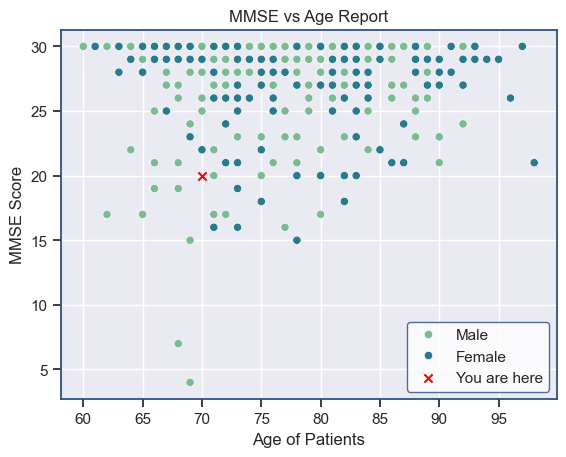

In [92]:
# cmap = sns.color_palette("crest")
# sns.set_theme(style='darkgrid', palette='crest')
# sns.set_style('ticks')
sns.set_style("darkgrid", {
    "axes.edgecolor": "#254b7f",
    "axes.line_width":.4,
    "xtick.bottom": True,
    "ytick.left": True,
    "xtick.direction": "out",
    "ytick.direction": "out"
})
sns.set_palette("crest")
print(sns.color_palette("crest").as_hex())
df['sex'] = df['sex'].replace({False:'Male', True:'Female'})
df['sex'].head()
sns.scatterplot(data=df, x=df['age'], y=df['mmse'], hue='sex', palette=["#7dba91","#287a8c"])
plt.scatter(70, 20, color='red', marker='x', s=35, label="You are here")
plt.title("MMSE vs Age Report")
plt.xlabel("Age of Patients")
plt.ylabel("MMSE Score")
plt.legend(frameon=True, facecolor='white', edgecolor='#254b7f', framealpha=0.8)
plt.show()
